# *Still need to add comments for code
# Scientific Question:
Is the ACTN3 gene sequences significantly different from the ACTN2 gene and is one more correlated with increased athletic performance? 


# Scientific Hypothesis:
If the ACTN3 gene is correlated with increased endurance and sprint athletic performance, then the ACTN3 gene will be significantly different from ACTN2 gene which is expressed in non-athletes. 

In [25]:
# Define panda
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import SeqIO
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
ACTN3 = SeqIO.read("ACTN3 sequence.fasta", "fasta")
print(ACTN3)

ID: NC_000011.10:66546395-66563334
Name: NC_000011.10:66546395-66563334
Description: NC_000011.10:66546395-66563334 Homo sapiens chromosome 11, GRCh38.p13 Primary Assembly
Number of features: 0
Seq('AATAGCCCTGCCGCAGCCCATCCAGCTGGCTCAGAGCCGTTCCCCATGCCCGGG...CCA')


In [27]:
ACTN2 = SeqIO.read("ACTN2 sequence.fasta", "fasta")
print(ACTN2)

ID: NC_000001.11:236686499-236764631
Name: NC_000001.11:236686499-236764631
Description: NC_000001.11:236686499-236764631 Homo sapiens chromosome 1, GRCh38.p13 Primary Assembly
Number of features: 0
Seq('GGAGCTGGTGCTTCGCCCGAGACCCAGCGCCCAGGCGTGTCGCCCCGAGAGGAG...AAA')


In [28]:
# Define two sequences to be aligned for pairwise sequence alignment
alignments = pairwise2.align.globalxx(ACTN3, ACTN2)
for a in alignments:
    print(format_alignment(*a))

ID: NC_00001-1.10-:--6654-63-95----6-65-63334-
Name: NC_00001-1.10-:--6654-63-95----6-65-63334-
Description: NC_00001-1.10-:--6654-63-95----6-65-63334- Homo sapiens chromosome 11, GRCh38.p13 Primary Assembly
Number of features: 0
Seq('AAT--AGCCCTGCCG--CA---GCCC-AT--CC-AGCTGGCTC-AGAGCCGT-TC-CCC--ATGCCC-GG-G...CCA--')
|||||||||||  |||  |  ||   |  |  |  | |  |  |  ||||||||||||||  |||  |  ||   |  |  |  | |  |  |  |||||||||||||||||||||  |||  |  ||   |  |  |  | |  |  |  ||||||||||||||||||||||||| ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||     ||  |||  |  |    |||| |   || |||  || | || | ||| || |||  | |    || ||||  |  ||
ID: NC_0000-01.1-1:2366--86-49-9-23676-46--3-1
Name: NC_0000-01.1-1:2366--86-49-9-23676-46--3-1
Description: NC_0000-01.1-1:2366--86-49-9-23676-46--3-1 Homo sapiens chromosome -1, GRCh38.p13 Primary Assembly
Number of features: 0
Seq('---GGAG--CTG--GTGC-TTCGCCCGA-GACCCAGC--GC-CCAG-G-CGTGTCGCCCCGA-G---AGGAG...--AAA')
  Score=210

ID: NC_000011.10-:--6654-63-95---

In [29]:
# P value
ACTN3males = pd.read_csv("ACTN3 male.txt", index_col = 0)
ACTN3males

,WT Genotype RR,Variant Genotype XX
Group,,
Male Controls,30,16
Male Sprint,53,8
Male Endurance,28,20


In [30]:
# No significant difference between the male control group with the ACTN3 gene and those without (ACTN3 deficient)
MaleControlsRR = stats.norm.rvs(loc = 5,scale = 10,size = 30)
MaleControlsXX = stats.norm.rvs(loc = 5,scale = 10,size = 16)
print(stats.ttest_ind(MaleControlsRR, MaleControlsXX))

# There exists a significant difference between the male sprint group with the ACTN3 gene and those without (ACTN3 deficient)
MaleSprintRR = stats.norm.rvs(loc = 5,scale = 10,size = 53)
MaleSprintXX = stats.norm.rvs(loc = 5,scale = 10,size = 8)
print(stats.ttest_ind(MaleSprintRR, MaleSprintXX))

# No significant difference between the male endurance group with the ACTN3 gene and those without (ACTN3 deficient)
MaleEnduranceRR = stats.norm.rvs(loc = 5,scale = 10,size = 28)
MaleEnduranceXX = stats.norm.rvs(loc = 5,scale = 10,size = 20)
print(stats.ttest_ind(MaleEnduranceRR, MaleEnduranceXX))

Ttest_indResult(statistic=1.3865618292267157, pvalue=0.17256113550679947)
Ttest_indResult(statistic=-0.5832609143520368, pvalue=0.5619406522136536)
Ttest_indResult(statistic=-0.8950903581339285, pvalue=0.3753987234140209)


In [31]:
ACTN3females = pd.read_csv("ACTN3 Female.txt", index_col = 0)
ACTN3females

,WT Genotype RR,Variant Genotype XX
Group,,
Female Controls,30,20
Female Sprint,43,0
Female Endurance,36,29


In [32]:
# There exists a significant difference between the female control group with the ACTN3 gene and those without (ACTN3 deficient)
FemaleControlsRR = stats.norm.rvs(loc = 5,scale = 10,size = 30)
FemaleControlsXX = stats.norm.rvs(loc = 5,scale = 10,size = 20)
print(stats.ttest_ind(FemaleControlsRR, FemaleControlsXX))

# No defined p-value, due to female sprint group without ACTN3 gene having 0 sample size. Can assume that a significant difference exists
FemaleSprintRR = stats.norm.rvs(loc = 5,scale = 10,size = 43)
FemaleSprintXX = stats.norm.rvs(loc = 5,scale = 10,size = 0)
print(stats.ttest_ind(FemaleSprintRR, FemaleSprintXX))

# There exists a significant difference between female endurance group with the ACTN3 gene and those without (ACTN3 deficient)
FemaleEnduranceRR = stats.norm.rvs(loc = 5,scale = 10,size = 36)
FemaleEnduranceXX = stats.norm.rvs(loc = 5,scale = 10,size = 29)
print(stats.ttest_ind(FemaleEnduranceRR, FemaleEnduranceXX))

Ttest_indResult(statistic=-0.21653633916217005, pvalue=0.8294873759869014)
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=0.2576205314562796, pvalue=0.7975394222016342)


In [33]:
ACTN3total = pd.read_csv("ACTN3 total.txt", index_col = 0)
ACTN3total

,WT Genotype RR,Variant Genotype XX
Group,,
Total Controls,30,18
Total Sprint,50,6
Total Endurance,31,24


In [34]:
# No significant difference between the total control group with the ACTN3 gene and those without (ACTN3 deficient)
TotalControlsRR = stats.norm.rvs(loc = 5,scale = 10,size = 30)
TotalControlsXX = stats.norm.rvs(loc = 5,scale = 10,size = 18)
print(stats.ttest_ind(TotalControlsRR, TotalControlsXX))

# No significant difference between total sprint group with the ACTN3 gene and those without (ACTN3 deficient)
TotalSprintRR = stats.norm.rvs(loc = 5,scale = 10,size = 50)
TotalSprintXX = stats.norm.rvs(loc = 5,scale = 10,size = 6)
print(stats.ttest_ind(TotalSprintRR, TotalSprintXX))

# No significant difference between total endurance group with the ACTN3 gene and those without (ACTN3 deficient)
TotalEnduranceRR = stats.norm.rvs(loc = 5,scale = 10,size = 31)
TotalEnduranceXX = stats.norm.rvs(loc = 5,scale = 10,size = 24)
print(stats.ttest_ind(TotalEnduranceRR, TotalEnduranceXX))

Ttest_indResult(statistic=1.0065366573932977, pvalue=0.3194229918304984)
Ttest_indResult(statistic=1.5540024570097035, pvalue=0.12602564056367144)
Ttest_indResult(statistic=2.2609736483410328, pvalue=0.02789106716561981)


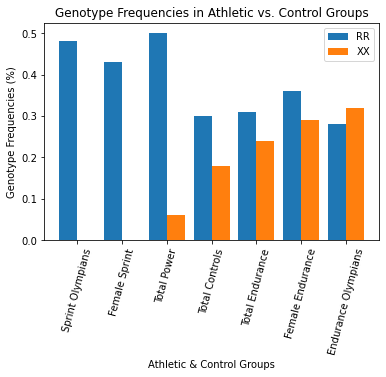

In [35]:
x = ["Sprint Olympians","Female Sprint","Total Power","Total Controls","Total Endurance","Female Endurance","Endurance Olympians"]

w=0.4

RR = [0.48, 0.43, 0.50, 0.30, 0.31, 0.36, 0.28]
XX = [0.00, 0.00, 0.06, 0.18, 0.24, 0.29, 0.32]

bar1 = np.arange(len(x)) #[0,1,2,3,4,5,6]
bar2 = [i+w for i in bar1]

plt.bar(bar1,RR,w,label= "RR")
plt.bar(bar2,XX,w,label= "XX")

plt.xlabel("Athletic & Control Groups")
plt.ylabel("Genotype Frequencies (%)")
plt.title("Genotype Frequencies in Athletic vs. Control Groups")
#labeling and positioning x labels
plt.xticks(bar1+w/2, x, rotation = 75)
plt.legend()

plt.show()